# NAME- RISHI KUMAR
# CWID - 20015656

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')
     

# Noisy scale plotting

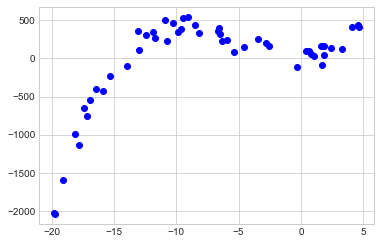

In [2]:

noise_scale = 100
num_of_samples = 50

x = 25 * (np.random.rand(num_of_samples, 1) - 0.8)    # 50 x 1 vector
x.sort(axis = 0)    # needed for graphs
y = 7 * x + 15 * x ** 2 + 1 * x ** 3 + noise_scale * np.random.randn(num_of_samples, 1) 
plt.plot(x,y,'bo')
      

# polynomial obtained in hw1 plot

<function matplotlib.pyplot.show(close=None, block=None)>

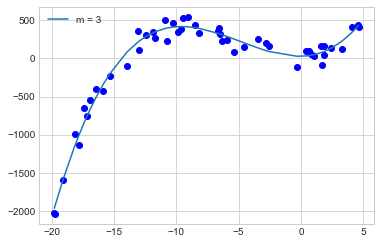

In [3]:
#chossing m =3 as foun on homework 1
m=3
x = x.ravel() # to make contiguous flattened array
y = y.ravel()
z = np.polyfit(x, y, m) # choosing m =3
p = np.poly1d(z) # to make z a polynomial  function
plt.plot(x,y, 'bo')
plt.plot(x, p(x),'-', label = 'm = 3')
plt.legend()
plt.show

In [4]:
def evaluate(y_actual, y_pred):
    return np.sum((y_actual - y_pred) ** 2)

In [5]:
badness_poly = evaluate(y, p(x))

In [6]:
print(f'{m} Degree Polynomial MSE - {badness_poly:.2f}')

3 Degree Polynomial MSE - 466242.93


In [19]:
# Initialization
num_of_chromosomes = 100
genes_per_chromosome = 4
chromosomes = np.random.uniform(low = -10, high = 10, size = (num_of_chromosomes, genes_per_chromosome))
chromosomes[0]


array([-9.38171173,  6.4457062 , -6.18621118,  1.46742771])

In [20]:
def create_badness_list(chromosomes):
    
    
    badness_list = []
    
    for i in range(num_of_chromosomes):
        genetic_coef = np.poly1d(chromosomes[i])    
        y_genetic = genetic_coef(x)    
        badness = evaluate(y, y_genetic)    
        badness_list.append(badness)
        
    return badness_list

# crossover function

In [21]:
def crossover(parents, offspring_size, rate):
    offspring = np.zeros(offspring_size)
    crossover_point = int(genes_per_chromosome / 2)    
    
    for i in range(offspring_size[0]):
        random_num = np.random.uniform(0, 1)    
        if float(random_num) > float(rate):    
            offspring[i] = parents[-1]    
            
        parent_1_idx = i % parents.shape[0]    
        parent_2_idx = (i + 1) % parents.shape[0]    
        offspring[i, 0:crossover_point] = parents[parent_1_idx, 0:crossover_point]    
        offspring[i, crossover_point:] = parents[parent_2_idx, crossover_point:]    
        
    return offspring

# mutation function

In [22]:
def mutation(offspring_crossover, rate):
    for i in range(offspring_crossover.shape[0]):
        random_num = np.random.uniform(0, 1)    
        if float(random_num) > float(rate):    
            continue
            
        random_idx = random.randrange(0, genes_per_chromosome - 1)    
        random_value = np.random.uniform(0, 2)   
        offspring_crossover[i, random_idx] = offspring_crossover[i, random_idx] * random_value    
        
    return offspring_crossover

In [23]:
# Main loop
best_badness_list = []    
for iteration in range(2500):
    badness_list = create_badness_list(chromosomes)
    top_10_chromosomes_idx = sorted(range(len(badness_list)), key=lambda i: badness_list[i], reverse=True)[-10:]
    best_badness = badness_list[top_10_chromosomes_idx[-1]]
    best_badness_list.append(best_badness)
    top_10_chromosomes = np.zeros((10, genes_per_chromosome))
    for i, j in enumerate(top_10_chromosomes_idx):
        top_10_chromosomes[i] = chromosomes[j]
    offspring_crossover = crossover(top_10_chromosomes, (num_of_chromosomes - 10, genes_per_chromosome), 0.8)# crossover rate = 0.8
    offspring_mutation = mutation(offspring_crossover, 0.1)# mutation rate = 0.1
    new_chromosomes = np.zeros((num_of_chromosomes, genes_per_chromosome))
    new_chromosomes[0:10, :] = top_10_chromosomes
    new_chromosomes[10:, :] = offspring_mutation
    chromosomes = new_chromosomes

In [27]:
y_genetic = np.poly1d(top_10_chromosomes[-1])

# GA plot

Text(0.5, 1.0, 'Genetic Algorithm - Polynomial')

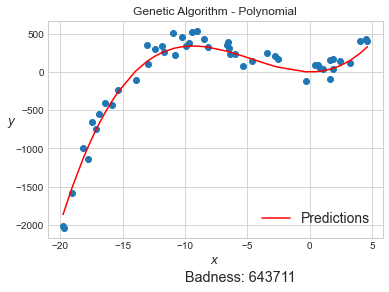

In [40]:
plt.scatter(x, y)
plt.plot(x, y_genetic(x), color = 'red', label = 'Predictions')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="lower right", fontsize=14)
plt.text(-10, -2750, f'Badness: {int(best_badness_list[-1])}', fontsize = 'x-large')
plt.title('Genetic Algorithm - Polynomial')

# q.3)Plot the following in one figure: 1) the original noisy data, 2) the polynomial you obtained in Homework  #1,  and  3)  the  polynomial  obtained  from  this  implementation.

Text(0.5, 1.0, 'Polynimal - Both Methods')

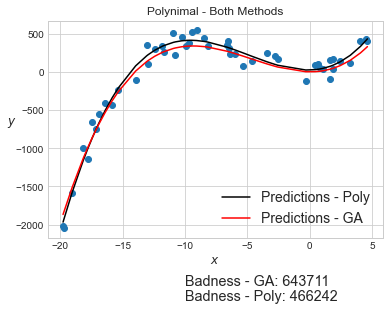

In [37]:
plt.scatter(x, y)    # plot data
plt.plot(x, p(x), color = 'black', label = 'Predictions - Poly')    # plot polynomial
plt.plot(x, y_genetic(x), color = 'red', label = 'Predictions - GA')    # plot GA poly
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="lower right", fontsize=14)
plt.text(-10, -3000, f'Badness - Poly: {int(badness_poly)}', fontsize = 'x-large')
plt.text(-10, -2800, f'Badness - GA: {int(best_badness_list[-1])}', fontsize = 'x-large')
plt.title('Polynimal - Both Methods')

## Discussion

A visualization of the initial noisy data, the polynomial produced by the approach in HW1, and the polynomial produced by the genetic algorithm are shown above. Although the polynomial created by the evolutionary algorithm does not quite suit the data as well as the original polynomial did, it nevertheless managed to produce a remarkably good polynomial with a respectable badness score.

Multiple iterations of the algorithm gave both better and worse results.It would be wise to run the method multiple times and select the best of the results. Another reason to run the algorithm multiple times while evaluating various values is that different solutions can be obtained depending on the initial values of the genes as well as the crossover and mutation rates.

All in all, by examining the polynomial plots and the badness ratings, we can verify that this technique performs as anticipated.